### In-Class Assignment: Web Scraping and Data Extraction from a New Webpage
Use the requests library to fetch a new webpage.
Parse the HTML content using BeautifulSoup.
Extract various elements such as figures, tables, and text.
Work collaboratively in groups to practice web scraping and present their findings.
- Task 1: Select a Webpage of interest (e.g., a news article, an educational resource, or a data-driven website). Ensure that the selected webpage contains a variety of elements, such as tables, figures, and text content.
- Task 2: Fetch and Parse the Webpage

In [272]:
import requests
from bs4 import BeautifulSoup

from PIL import Image
from io import BytesIO, StringIO
import IPython.display as display

url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP'
response = requests.get(url)

In [274]:

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print("Failed to fetch the webpage.")

Successfully fetched the webpage!


In [276]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
#print(soup)

### Task 3: Extract Elements

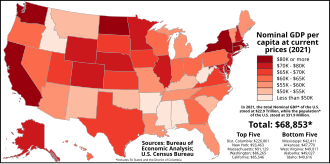

In [290]:
#Find all images and extract their src attributes.
images = soup.find_all('img')
image_urls = [img['src'] for img in images if 'src' in img.attrs]

from IPython.display import Image, display
#for url in image_urls:
    #display(Image(url=url))
    
url_image = "https:"+image_urls[4]
response = requests.get(url_image)
display(Image(response.content))

In [326]:
# Locate and extract all tables on the webpage, converting them into Pandas DataFrames.
import pandas as pd

tables = soup.find_all('table')
table = tables[0] if tables else None
df = pd.read_html(StringIO(str(table)))[0]
df.head()

State or federal district  \
  State or federal district   
0              California *   
1                   Texas *   
2                New York *   
3                 Florida *   
4                Illinois *   

  Nominal GDP at current prices 2023 (millions of U.S. dollars)[1]           \
                                                              2022     2024   
0                                            3641643                3987285   
1                                            2402137                2664144   
2                                            2048403                2226903   
3                                            1439065                1647446   
4                                            1025667                1107087   

  Annual GDP change at current prices (2022–2023)[1]  \
  Annual GDP change at current prices (2022–2023)[1]   
0                                             220528   
1                                             161371   
2                                             103859   
3                                             140438   
4                                              57301   

                                                        \
  Annual GDP change at current prices (2022–2023)[1].1   
0                                               6.1%     
1                                               6.7%     
2                                               5.1%     
3                                               9.8%     
4                                               5.6%     

  Real GDP growth rate (2022–2023)[1] Nominal GDP per capita[1][3]            \
  Real GDP growth rate (2022–2023)[1]                         2022      2024   
0                                2.1%                      $93,460  $102,527   
1                                5.7%                      $78,750   $86,004   
2                                0.7%                     $104,660  $114,380   
3                                5.0%                      $63,640   $71,703   
4                                1.3%                      $81,730   $88,447   

  % of national[1]          
              2022    2023  
0           14.69%  14.11%  
1            8.69%   9.37%  
2            8.11%   7.86%  
3            5.37%   5.77%  
4            4.11%   3.96%

In [328]:
for i, table in enumerate(tables):
    df = pd.read_html(StringIO(str(table)))[0]
    print(f"Table {i+1}:\n", df.head(), "\n")

Table 1:
   State or federal district  \
  State or federal district   
0              California *   
1                   Texas *   
2                New York *   
3                 Florida *   
4                Illinois *   

  Nominal GDP at current prices 2023 (millions of U.S. dollars)[1]           \
                                                              2022     2024   
0                                            3641643                3987285   
1                                            2402137                2664144   
2                                            2048403                2226903   
3                                            1439065                1647446   
4                                            1025667                1107087   

  Annual GDP change at current prices (2022–2023)[1]  \
  Annual GDP change at current prices (2022–2023)[1]   
0                                             220528   
1                                             1613

In [330]:
#Extract the main text content, such as paragraphs or headings.
paragraphs = soup.find_all('p')
text_content = ' '.join([para.get_text() for para in paragraphs])
print(text_content[:593])  # Print the first 593 characters


 This is a list of U.S. states and territories by gross domestic product (GDP). This article presents the 50 U.S. states and the District of Columbia and their nominal GDP at current prices.
 The data source for the list is the Bureau of Economic Analysis (BEA) in 2024. The BEA defined GDP by state as "the sum of value added from all industries in the state."[1]
 Nominal GDP does not take into account differences in the cost of living in different countries, and the results can vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. 


### Task 4: Analyze and Discuss Findings
Each group will analyze the extracted data and discuss the following:
- What figures (images) were extracted and what do they represent?
- What information is contained in the tables, and how does it contribute to the overall content of the webpage?
- What is the main focus of the text content extracted? How does it relate to the images and tables?
- Discuss the challenges faced during extraction, such as dealing with complex HTML structures or incomplete data.

### Task 5: Present Findings
Shares your analysis of the extracted elements.
Discusses any patterns, relationships, or insights gained from the data.

Each group should submit their Jupyter notebook (or Python script) with the code, analysis, and any additional notes or reflections on the exercise.

1) We extracted an image called "660px-GDP_per_capita_by_U.S._state.svg.png." It represents "The GDP per capita of each U.S. state and the District of Columbia in 2021 according to the U.S. Bureau of Economic Analysis and the U.S. Census Bureau."

2) The table contains the information visually represented in the image in (1). It displays such information as the name of the state, that state's GDP for 2023 and 2024, that state's GDP as a percentage of national GDP, etc. This table is the main purpose of the page from which it was extracted.

3) The text content explains the purpose of the page and the mentioned table and image. It is explaining that the table and the image are displaying state and territories' GDP as well as where the information is coming from.

4) There were a lot of learning opportunities here. Making sure that the correct libraries were imported as well as recalling syntax were challenges. Of course, extracting images and tables from a URL is an entirely new task for this user as well. There was also time spent learning how to use the new StringIO object.